In [14]:
import numpy as np
import pandas as pd

mandarine_consume = pd.read_excel('predict_consume2.xlsx', index_col='년도')

mandarine_consume.describe()
mandarine_consume.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 1985 to 2019
Data columns (total 24 columns):
 귤도매가격            24 non-null float64
귤소매가격             27 non-null float64
오렌지도매가격           22 non-null float64
오렌지소매가격           22 non-null float64
사과도매가격            24 non-null float64
배도매가격             24 non-null float64
딸기도매가격            24 non-null float64
감도매가격             24 non-null float64
바나나도매가격           24 non-null float64
참다래도매가격(수입)       24 non-null float64
포도도매가격            24 non-null float64
생산자물가지수(감귤)       35 non-null float64
소비자물가지수(감귤)       35 non-null float64
1인당 가처분소득         26 non-null float64
1인당 연간소비량(kg)     21 non-null float64
gdp_deflator      26 non-null float64
과일류 1인당 연간 소비량    22 non-null float64
1인가구비율            19 non-null float64
수입개방화(신선)         10 non-null float64
수입개방화(가공)         10 non-null float64
수입량(톤)            10 non-null float64
수입액(천달러)          10 non-null float64
수입량(톤).1          11 non-null float64
수입액(천달러).1        

In [15]:
mandarine_consume.columns = ['mand_whole_price', 'mand_retail_price', 'orange_whole_price', 'orange_retail_price',
                             'apple_whole_price', 'pear_whole_price', 'strberry_whole_price', 'persimon_whole_price',
                             'banana_whole_price','kiwi_whole_price', 'graph_whole_price',
                            'product_index', 'consumer_index', 'per_person_income', 'per_person_consume_kg', 'gpd_deflator',
                            'per_person_fruit_kg','alone_house_ratio','fresh_import','product_import','import_ton',
                            'import_dollar','import_ton2', 'import_dollar2']
mandarine_consume

,mand_whole_price,mand_retail_price,orange_whole_price,orange_retail_price,apple_whole_price,pear_whole_price,strberry_whole_price,persimon_whole_price,banana_whole_price,kiwi_whole_price,...,per_person_consume_kg,gpd_deflator,per_person_fruit_kg,alone_house_ratio,fresh_import,product_import,import_ton,import_dollar,import_ton2,import_dollar2
년도,,,,,,,,,,,,,,,,,,,,,
1985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.1,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1989,NaN,3660.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.5,NaN,41.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992,NaN,6015.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,55.196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# y를 평균으로 채운 것 per_person_consume_kg_fillmean / 아닌건 per_person_consume_kg
median = mandarine_consume['per_person_consume_kg'].median()
mean = mandarine_consume['per_person_consume_kg'].mean()
print(mean)

mandarine_consume['per_person_consume_kg_fillmean'] = mandarine_consume['per_person_consume_kg'].fillna(mean)
mandarine_consume['per_person_consume_kg_fillmean']
mandarine_consume

12.833333333333334


,mand_whole_price,mand_retail_price,orange_whole_price,orange_retail_price,apple_whole_price,pear_whole_price,strberry_whole_price,persimon_whole_price,banana_whole_price,kiwi_whole_price,...,gpd_deflator,per_person_fruit_kg,alone_house_ratio,fresh_import,product_import,import_ton,import_dollar,import_ton2,import_dollar2,per_person_consume_kg_fillmean
년도,,,,,,,,,,,,,,,,,,,,,
1985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.100000
1986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.833333
1987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.833333
1988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.833333
1989,NaN,3660.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.833333
1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,41.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.500000
1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.833333
1992,NaN,6015.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.833333
1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55.196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.833333


In [17]:
#결측값을 앞 방향 혹은 뒷 방향으로 채우기 (fill gaps forward or backward)

#      : fillna(method='ffill' or 'pad'), fillna(method='bfill' or 'backfill')



# 출처: https://rfriend.tistory.com/262 [R, Python 분석과 프로그래밍의 친구 (by R Friend)]

mandarine_consume['fresh_import'] = mandarine_consume['fresh_import'].fillna(method='ffill')
mandarine_consume['fresh_import'] = mandarine_consume['fresh_import'].fillna(0)


mandarine_consume['product_import'] = mandarine_consume['product_import'].fillna(method='ffill')
mandarine_consume['product_import'] = mandarine_consume['product_import'].fillna(0)
mandarine_consume

,mand_whole_price,mand_retail_price,orange_whole_price,orange_retail_price,apple_whole_price,pear_whole_price,strberry_whole_price,persimon_whole_price,banana_whole_price,kiwi_whole_price,...,gpd_deflator,per_person_fruit_kg,alone_house_ratio,fresh_import,product_import,import_ton,import_dollar,import_ton2,import_dollar2,per_person_consume_kg_fillmean
년도,,,,,,,,,,,,,,,,,,,,,
1985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,36.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,9.100000
1986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,12.833333
1987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,12.833333
1988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,12.833333
1989,NaN,3660.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,12.833333
1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,41.8,NaN,0.0,0.0,NaN,NaN,NaN,NaN,11.500000
1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,12.833333
1992,NaN,6015.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,12.833333
1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55.196,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,12.833333


In [20]:
drop_columns = ['import_ton', 'import_dollar', 'import_ton2', 'import_dollar2', 'alone_house_ratio', 'per_person_fruit_kg']
mandarine_consume_df = mandarine_consume.drop(columns=drop_columns)
mandarine_consume_df

,mand_whole_price,mand_retail_price,orange_whole_price,orange_retail_price,apple_whole_price,pear_whole_price,strberry_whole_price,persimon_whole_price,banana_whole_price,kiwi_whole_price,graph_whole_price,product_index,consumer_index,per_person_income,per_person_consume_kg,gpd_deflator,fresh_import,product_import,per_person_consume_kg_fillmean
년도,,,,,,,,,,,,,,,,,,,
1985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.76,37.358,NaN,9.1,NaN,0.0,0.0,9.100000
1986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.75,33.855,NaN,NaN,NaN,0.0,0.0,12.833333
1987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.60,47.416,NaN,NaN,NaN,0.0,0.0,12.833333
1988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.17,45.652,NaN,NaN,NaN,0.0,0.0,12.833333
1989,NaN,3660.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.41,49.120,NaN,NaN,NaN,0.0,0.0,12.833333
1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.55,40.040,NaN,11.5,NaN,0.0,0.0,11.500000
1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112.21,77.318,NaN,NaN,NaN,0.0,0.0,12.833333
1992,NaN,6015.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.08,70.595,NaN,NaN,NaN,0.0,0.0,12.833333
1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.07,59.760,26996.3636,NaN,55.196,0.0,0.0,12.833333


In [7]:
mandarine_consume_df = mandarine_consume_df.dropna()
mandarine_consume_df

,mand_whole_price,mand_retail_price,orange_whole_price,orange_retail_price,apple_whole_price,pear_whole_price,strberry_whole_price,persimon_whole_price,banana_whole_price,kiwi_whole_price,graph_whole_price,product_index,consumer_index,per_person_income,per_person_consume_kg,gpd_deflator,fresh_import,product_import,per_person_consume_kg_fillmean
년도,,,,,,,,,,,,,,,,,,,
2000,7417.333333,11800.000000,14240.000000,52580.0,17460.0,14560.0,26330.0,10600.0,8610.0,32130.0,1571.0,58.74,55.410,61964.6448,11.9,72.119,0.0,0.0,11.9
2002,5312.000000,8866.666667,22410.000000,63440.0,27500.0,16510.0,34850.0,18000.0,11390.0,30640.0,2127.0,84.83,84.325,75338.7816,13.3,76.892,0.0,0.0,13.3
2003,9075.000000,26300.000000,17700.000000,56280.0,22660.0,14620.0,43200.0,17590.0,10660.0,33510.0,2561.0,57.45,63.620,82105.3168,13.0,79.544,0.0,0.0,13.0
2004,12609.000000,27000.000000,18720.000000,58280.0,36010.0,26480.0,43380.0,19540.0,10310.0,35080.0,3220.0,96.77,85.198,90825.8304,12.0,82.032,0.0,0.0,12.0
2005,12133.000000,16500.000000,16700.000000,63520.0,41280.0,19550.0,49150.0,22930.0,9880.0,35050.0,2849.0,143.35,106.735,95684.7528,13.1,82.887,0.0,0.0,13.1
2006,13026.000000,31800.000000,18650.000000,63380.0,30310.0,13420.0,46880.0,18750.0,10400.0,31220.0,3099.0,100.05,84.334,99341.6424,12.7,82.702,0.0,0.0,12.7
2007,7101.000000,13100.000000,23090.000000,70610.0,30950.0,22210.0,59720.0,21370.0,10780.0,30700.0,2902.0,157.50,109.137,107368.2552,16.0,84.702,0.0,0.0,16.0
2008,12719.000000,22100.000000,19320.000000,60350.0,29200.0,13370.0,59920.0,17860.0,12830.0,32550.0,3165.0,59.02,67.663,116943.7992,13.0,87.096,1.6,1.4,13.0
2009,11353.000000,19300.000000,27400.000000,80370.0,30960.0,18680.0,58650.0,20750.0,15830.0,37830.0,2607.0,73.20,93.346,124746.3936,15.2,90.239,1.6,1.4,15.2


In [21]:
# 실질가격 변환 없이 명목가격으로 한번 해보쟈...
cols_fruit = ['mand_whole_price', 'orange_whole_price', 'apple_whole_price', 'pear_whole_price',
              'strberry_whole_price', 'persimon_whole_price', 'banana_whole_price', 'kiwi_whole_price',
              'graph_whole_price', 'per_person_income','per_person_consume_kg']
mandarine_consume_df_final = mandarine_consume_df[cols_fruit]
mandarine_consume_df_final

,mand_whole_price,orange_whole_price,apple_whole_price,pear_whole_price,strberry_whole_price,persimon_whole_price,banana_whole_price,kiwi_whole_price,graph_whole_price,per_person_income,per_person_consume_kg
년도,,,,,,,,,,,
1985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.1
1986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.5
1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26996.3636,NaN


In [22]:
# 종속변수 / 독립변수 지정
X = mandarine_consume_df_final.iloc[:,:-1]
X
y = mandarine_consume_df_final.iloc[:,-1]

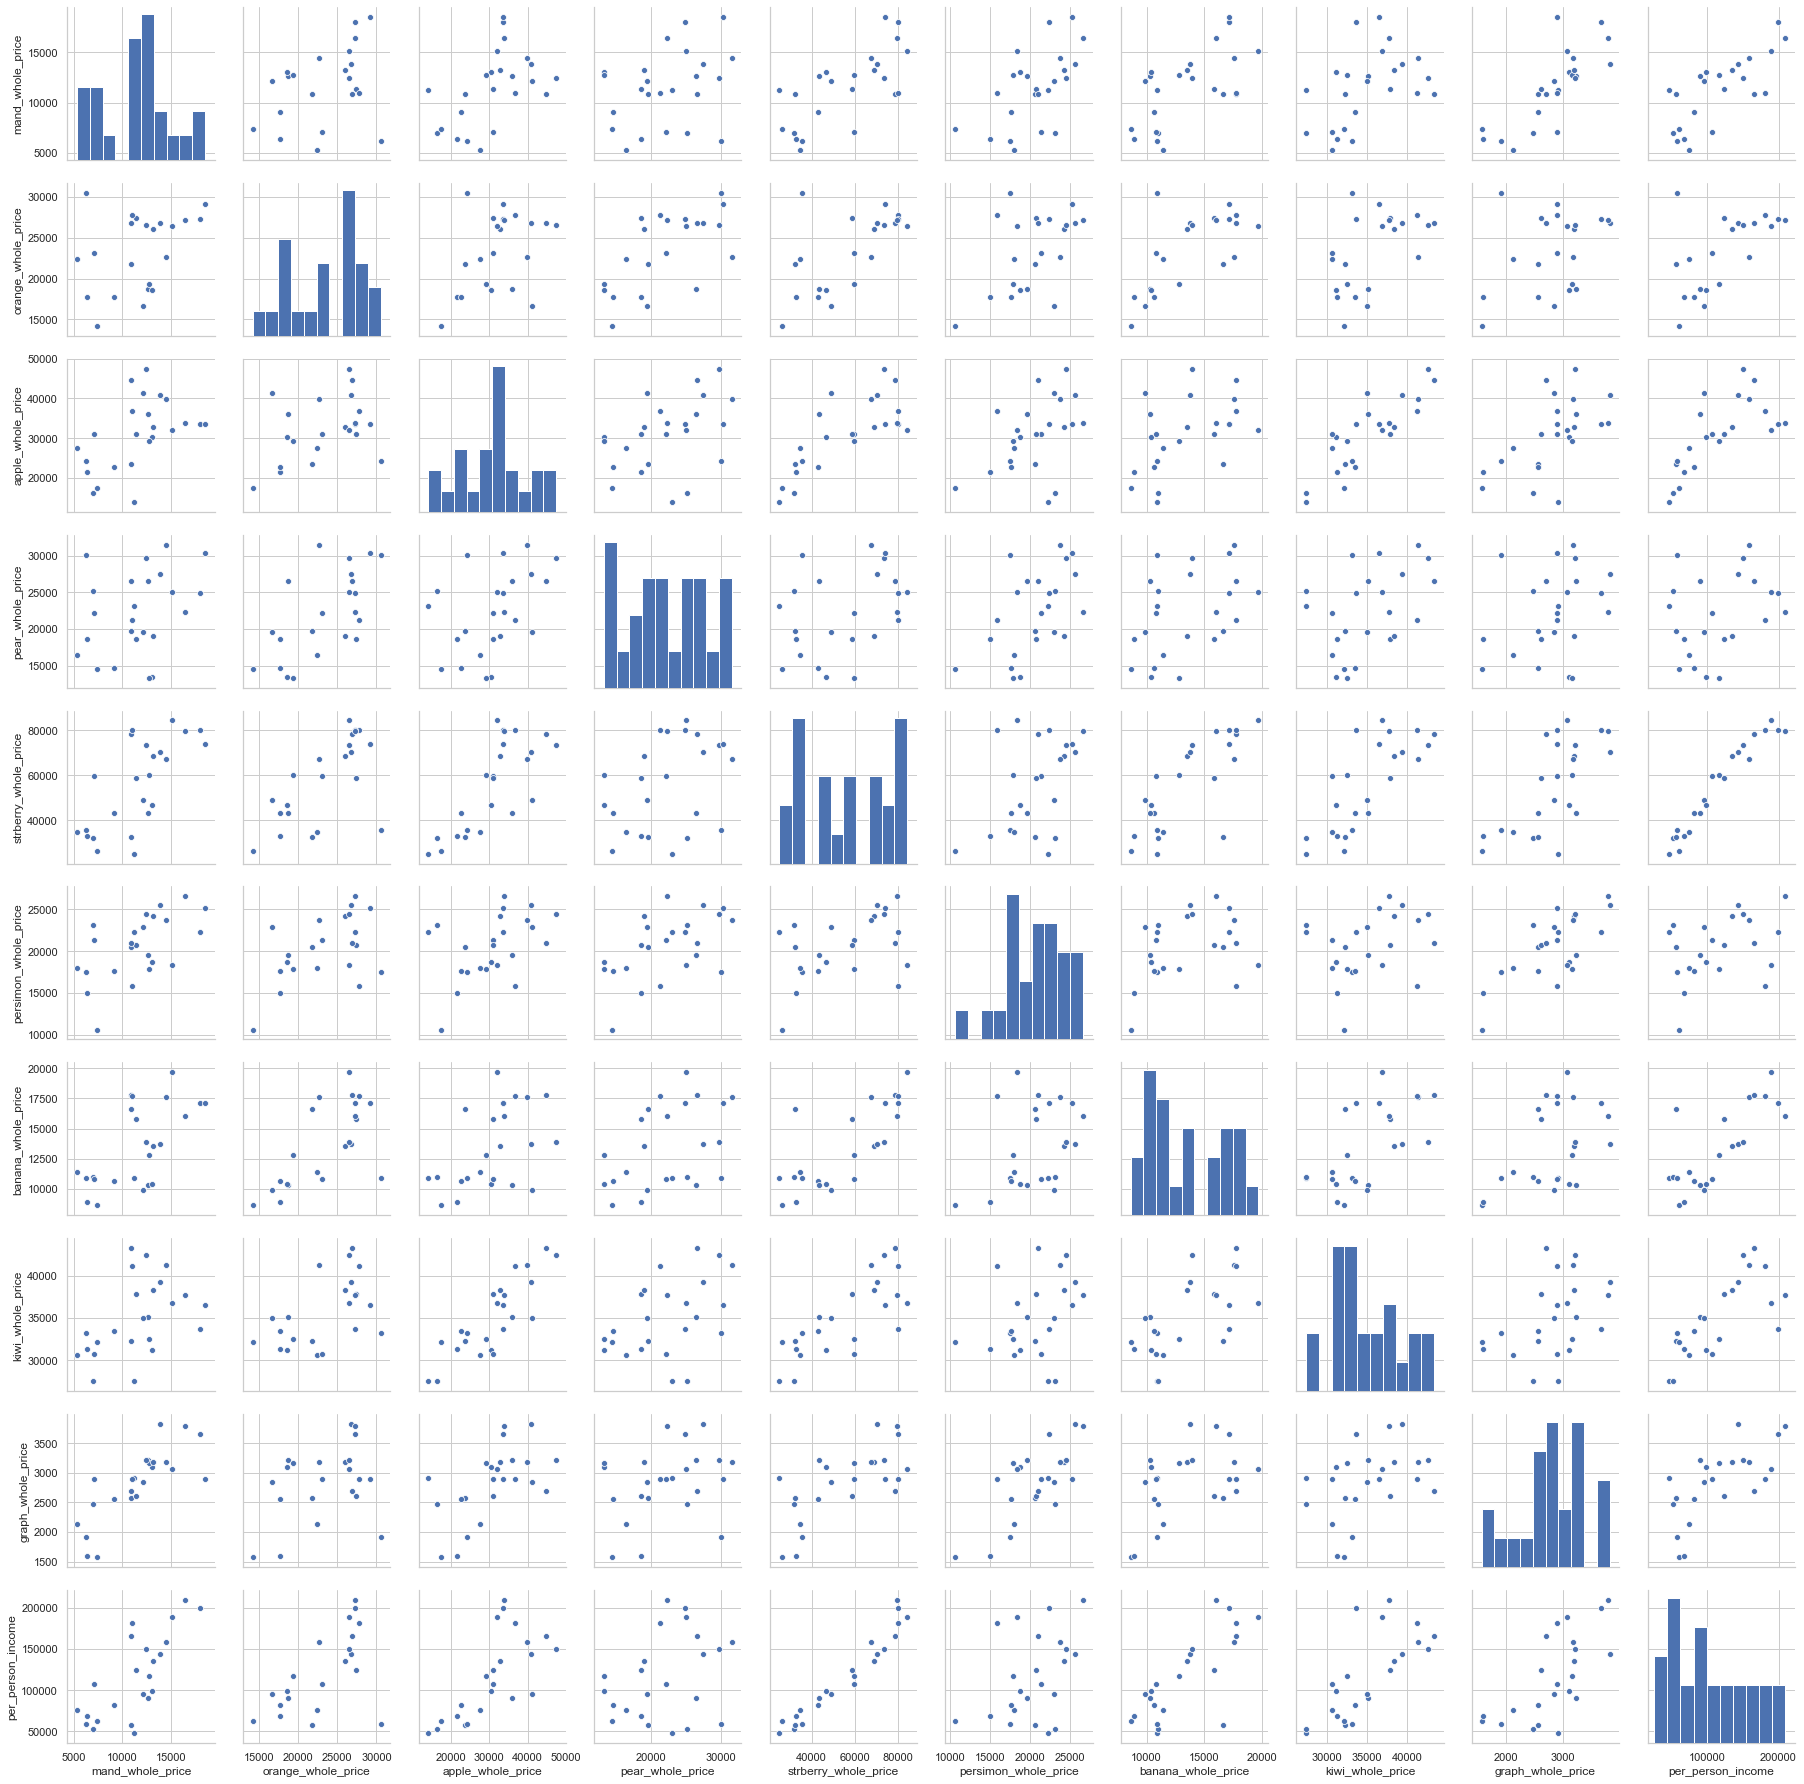

In [26]:
# 페어플롯
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', context='notebook') #  set 함수는 스타일을 지정해주는 환경변수
#Parameter 
#- context: string. or dict. 배율조정. 그림 사이즈의 크기가 아니라 그레프의 배율이 커진다.
# - style: string. or dict. {None, 'darkgrid', 'white grid', 'dark', 'white', 'ticks'} 중 하나 가 들어간다.
sns.pairplot(X, height=2.5)
plt.show()
sns.reset_orig()

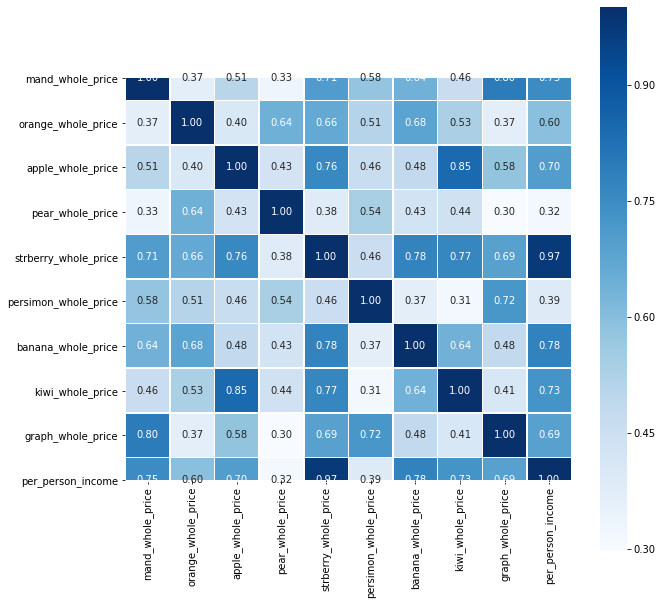

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(data=X.corr(), annot=True, square=True, fmt='.2f', linewidths=.5, cmap='Blues')
plt.show()

In [32]:
# 정규화 4가지 버젼 다 해보쟝
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale, StandardScaler
scale_X = scale(X)
robust_X = robust_scale(X)
minmax_X = minmax_scale(X)
maxabs_X = maxabs_scale(X)
scaler = StandardScaler()
stdScale_X = scaler.fit(X)

In [33]:
# train / test set을 나눕시당
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(minmax_X, y, random_state=0)

In [34]:
# 최소자승법을 해봅시다!
import statsmodels.api as sm
result = sm.OLS(y_train, X_train).fit()
result.summary()
# 사과, 딸기, 포도를 빼고 해야 하나?

MissingDataError: exog contains inf or nans

In [35]:
# 사과, 딸기, 포도를 빼고 간닷
cols_fruit_sub = ['mand_whole_price', 'orange_whole_price', 'pear_whole_price',
               'persimon_whole_price', 'banana_whole_price', 'kiwi_whole_price',
              'per_person_income','per_person_consume_kg']
mandarine_consume_df_sub = mandarine_consume_df[cols_fruit_sub]
mandarine_consume_df_sub

,mand_whole_price,orange_whole_price,pear_whole_price,persimon_whole_price,banana_whole_price,kiwi_whole_price,per_person_income,per_person_consume_kg
년도,,,,,,,,
1985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.1
1986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.5
1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993,NaN,NaN,NaN,NaN,NaN,NaN,26996.3636,NaN


In [37]:
X_sub = mandarine_consume_df_sub.iloc[:,:-1]
X_sub
y_sub = mandarine_consume_df_sub.iloc[:,-1]

In [38]:
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale, StandardScaler
scale_X2 = scale(X_sub)
robust_X2 = robust_scale(X_sub)
minmax_X2 = minmax_scale(X_sub)
maxabs_X2 = maxabs_scale(X_sub)
scaler = StandardScaler()
stdScale_X2 = scaler.fit(X_sub)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y_sub, random_state=0)

import statsmodels.api as sm
result2 = sm.OLS(y_train, X_train).fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     per_person_consume_kg   R-squared (uncentered):                   0.977
Model:                               OLS   Adj. R-squared (uncentered):              0.950
Method:                    Least Squares   F-statistic:                              36.22
Date:                   Tue, 21 Jan 2020   Prob (F-statistic):                    0.000171
Time:                           15:36:56   Log-Likelihood:                         -26.993
No. Observations:                     13   AIC:                                      67.99
Df Residuals:                          6   BIC:                                      71.94
Df Model:                              7                                                  
Covariance Type:               nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            44.1897      9.596      4.605      0.004      20.709      67.671
x2            -4.9766      7.736     -0.643      0.544     -23.907      13.954
x3           -13.8089      4.990     -2.767      0.033     -26.020      -1.598
x4           -17.8157      9.792     -1.819      0.119     -41.776       6.144
x5            -5.9901      9.870     -0.607      0.566     -30.142      18.161
x6            32.7075      9.802      3.337      0.016       8.724      56.691
x7           -11.5443     11.482     -1.005      0.353     -39.639      16.551
==============================================================================
Omnibus:                        5.788   Durbin-Watson:                   1.395
Prob(Omnibus):                  0.055   Jarque-Bera (JB):                2.488
Skew:                           0.910   Prob(JB):                        0.288
Kurtosis:                       4.133   Cond. No.                         38.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
result2.params

x1    44.189712
x2    -4.976588
x3   -13.808860
x4   -17.815712
x5    -5.990109
x6    32.707452
x7   -11.544298
dtype: float64